# Polynomial Interpolation

In [1]:
from scipy import interpolate
from numpy import polynomial as P

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

### Vandermonde Matrix

Trefethen, Bau Numerical Linear Algebra, Example 1.1. Vandermonde Matrix pages 4-5

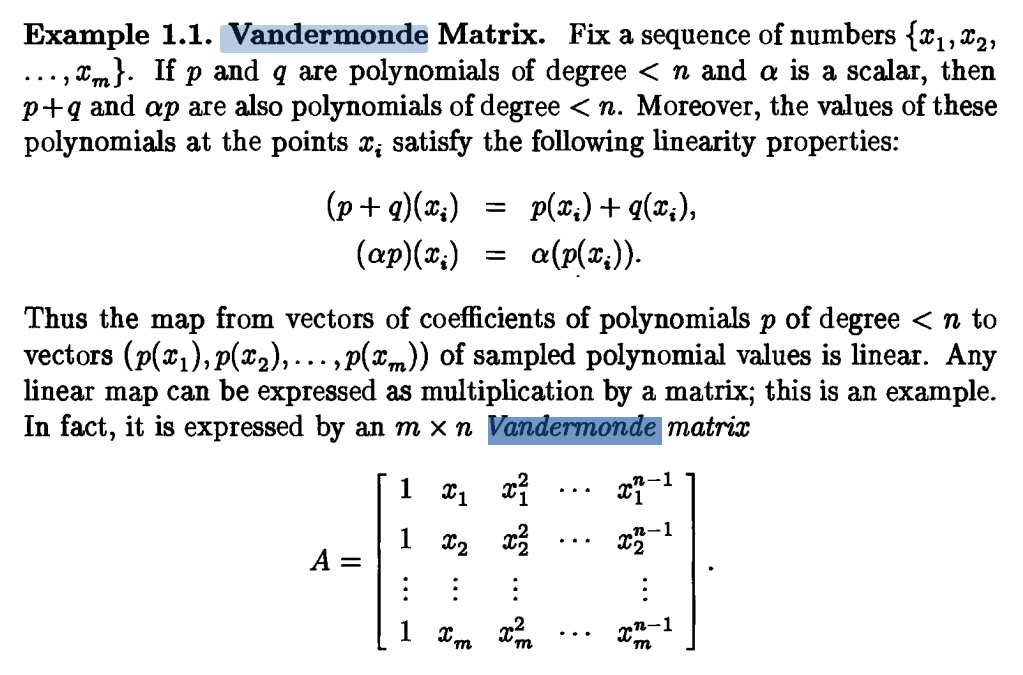
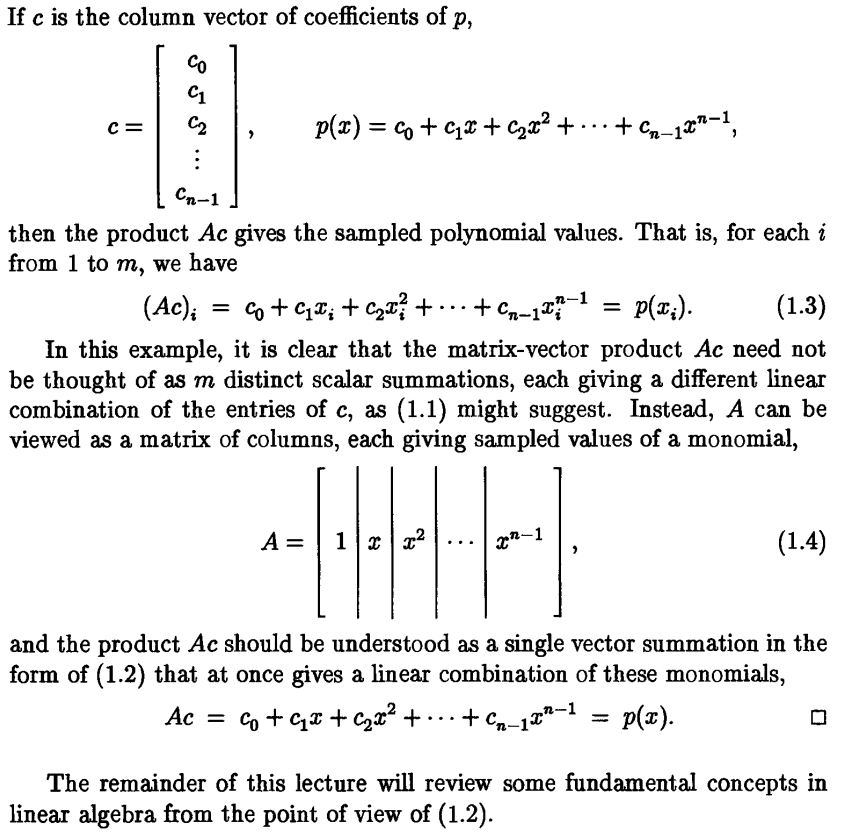

### Vandermonde Matrix for Interpolation

Computational Science and Engineering, Gil Strang,

Chapter 5.4 Spectral Methods of Exponential Accuracy p. 441

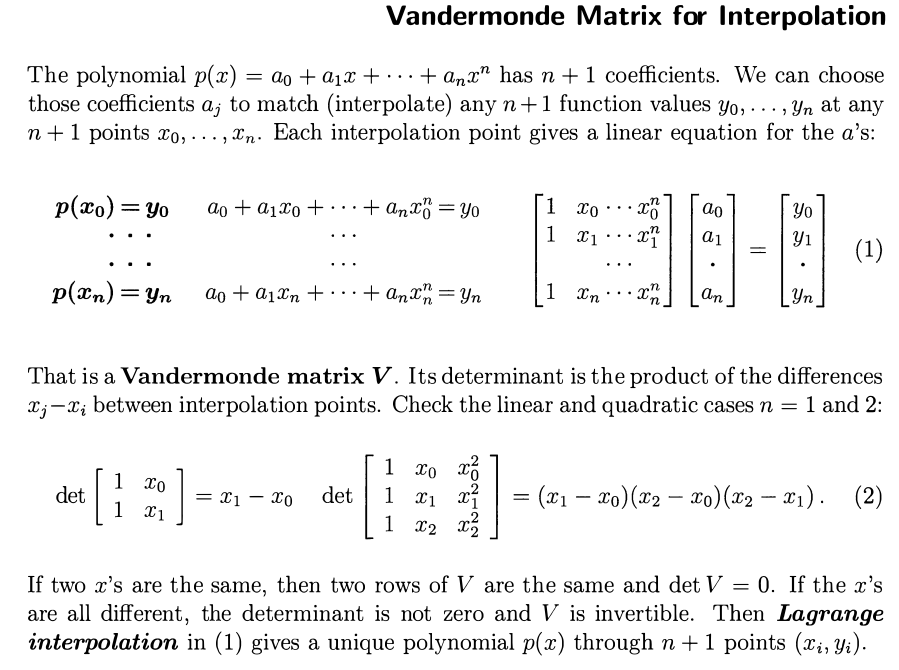
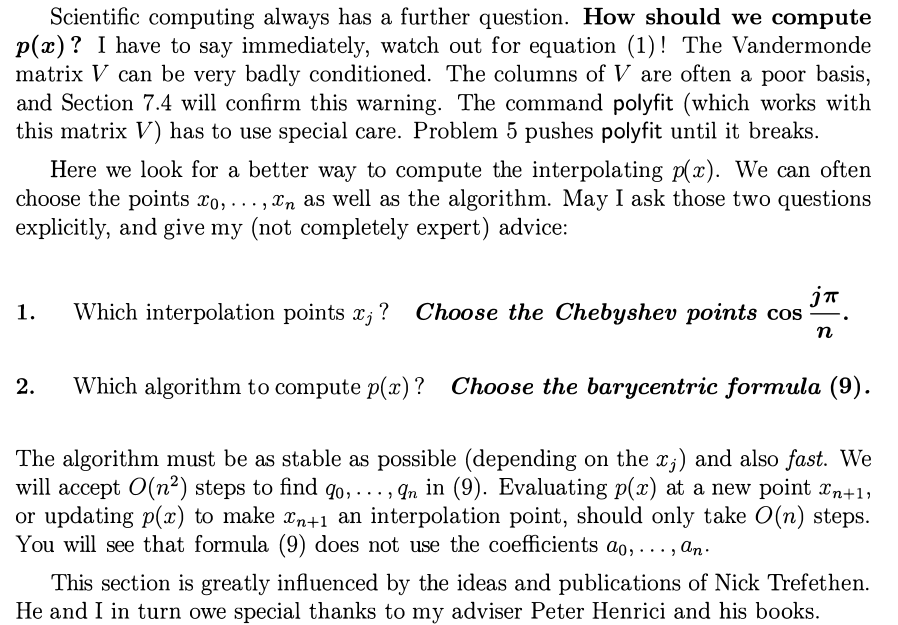

In [2]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 3, 5, 4])

deg = len(x) - 1

# Vandermonde matrix
A = P.polynomial.polyvander(x, deg)
A

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [3]:
# Polynomial coeffs
c = linalg.solve(A, y)
c

array([ 2. , -3.5,  3. , -0.5])

In [4]:
points = [2.5, 1/3, 2]
points

[2.5, 0.3333333333333333, 2]

In [5]:
# Polynomial representation
f1 = P.Polynomial(c)
f1

Polynomial([ 2. , -3.5,  3. , -0.5], domain=[-1,  1], window=[-1,  1])

In [6]:
res1 = np.array([f1(x) for x in points], dtype=float)
res1

array([4.1875    , 1.14814815, 3.        ])

> To perform this polynomial interpolation in another polynomial basis, all that we need to change is the name of the function that was used to generate the Vandermonde matrix $A$ in the previous example. For example, to interpolate using the Chebyshev basis polynomials, we can do

In [7]:
A = P.chebyshev.chebvander(x, deg)
A

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   7.,  26.],
       [  1.,   3.,  17.,  99.],
       [  1.,   4.,  31., 244.]])

In [8]:
# Chebyshev popynomial coeff
c = linalg.solve(A, y)
c

array([ 3.5  , -3.875,  1.5  , -0.125])

In [9]:
# Chebyshev polynomial representation
f2 = P.Chebyshev(c)
f2

Chebyshev([ 3.5  , -3.875,  1.5  , -0.125], domain=[-1,  1], window=[-1,  1])

In [10]:
res2 = np.array([f2(x) for x in points])
res2

array([4.1875    , 1.14814815, 3.        ])

### The same results!

In [55]:
np.all(np.round(res1, decimals=4) == np.round(res2, decimals=4))

True

> As expected, the coefficient array has different values in this basis, and the interpolation polynomial in the Chebyshev basis is $f(x) = 3.5T_0(x) − 3.875T_1(x)+1.5T_2(x) − 0.125T_3(x)$.
However, regardless of the polynomial basis, the interpolation polynomial is unique, and evaluating the interpolant will always result in the same values

### Polynomial interpolation of four data points, using power basis and the Chebyshev basis

Text(0.5, 0, '$x$')

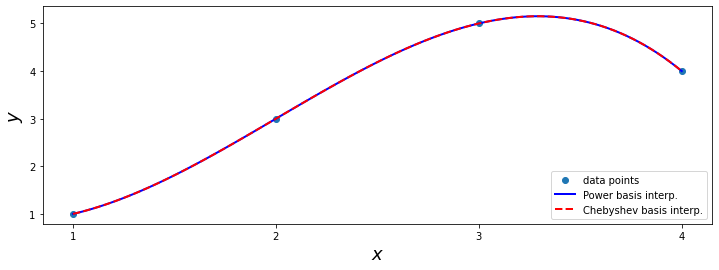

In [12]:
# supersampled [x[0], x[-1]] interval
xx = np.linspace(x.min(), x.max(), 100)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

# Draw data points
ax.scatter(x, y, label='data points')

ax.plot(xx, f1(xx), 'b', lw=2, label='Power basis interp.')
ax.plot(xx, f2(xx), 'r--', lw=2, label='Chebyshev basis interp.')

ax.legend(loc=4)

ax.set_xticks(x)

ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

### Each polynomial class provides a class method `fit` that can be used to compute an interpolation polynomial

In [13]:
f1b = P.Polynomial.fit(x, y, deg)
f1b

Polynomial([ 4.1875,  3.1875, -1.6875, -1.6875], domain=[1., 4.], window=[-1.,  1.])

In [30]:
f2b = P.Chebyshev.fit(x, y, deg)
f2b

Chebyshev([ 3.34375 ,  1.921875, -0.84375 , -0.421875], domain=[1., 4.], window=[-1.,  1.])

As mentioned previously, mapping the interpolation data into the range that is most suitable for a specific basis can significantly improve the numerical stability of the interpolation. For example, using the Chebyshev basis with $x$ values that are scaled such that $x ∈ [−1, 1]$, rather than the original $x$ values in the previous example, reduces the condition number from almost `4660` to about `1.85`

In [31]:
x

array([1, 2, 3, 4])

In [32]:
P.chebyshev.chebvander(x, deg)

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   7.,  26.],
       [  1.,   3.,  17.,  99.],
       [  1.,   4.,  31., 244.]])

In [33]:
# poor condition
np.linalg.cond(_)

4659.738424140432

In [34]:
(2*x-5)/3.0

array([-1.        , -0.33333333,  0.33333333,  1.        ])

In [35]:
P.chebyshev.chebvander(_, deg)

array([[ 1.        , -1.        ,  1.        , -1.        ],
       [ 1.        , -0.33333333, -0.77777778,  0.85185185],
       [ 1.        ,  0.33333333, -0.77777778, -0.85185185],
       [ 1.        ,  1.        ,  1.        ,  1.        ]])

In [36]:
# In range [-1, 1] it has very good cond number!
np.linalg.cond(_)

1.8542033440472903

> Polynomial interpolation of a few data points is a powerful and useful mathematical tool, which is an important part of many mathematical methods. When the number
of data points increases, we need to use increasingly high-order polynomials for exact interpolation, and this is problematic in several ways. To begin with, it becomes increasingly demanding to both determine and evaluate the interpolant for increasing polynomial order. However, a more serious issue is that high-order polynomial interpolation can have undesirable behavior between the interpolation points.


Although the interpolation is exact at the given data points, a high-order polynomial can vary wildly between the specified points. This is famously illustrated by polynomial interpolation of Runge’s function $f(x) = 1/(1+25x^2)$ using evenly spaced sample points in the interval $[−1, 1]$. The result is an interpolant that nearly diverges between the data points near the end of the interval.

To illustrate this behavior, we create a Python function runge that implements Runge’s function, and a function `runge_interpolate` that interpolates an nth order
polynomial, in the power basis, to the Runge’s function at evenly spaced sample points

In [38]:
def runge(x):
    return 1/(1 + 25 * x**2)

def runge_interpolate(n):
    x = np.linspace(-1, 1, n + 1)
    p = P.Polynomial.fit(x, runge(x), deg=n)
    return x, p

### The Runge’s function together with two high-order polynomial interpolations

Text(0.5, 0, '$x$')

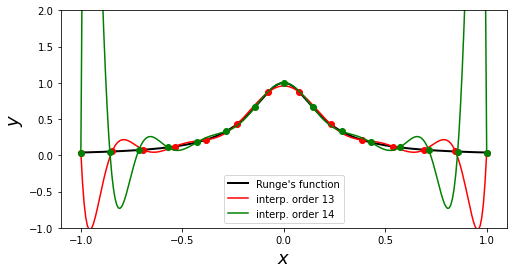

In [43]:
xx = np.linspace(-1, 1, 250)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, runge(xx), 'k', lw=2, label="Runge's function")

# 13th order interpolation of the Runge function
n = 13
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'ro')
ax.plot(xx, p(xx), 'r', label='interp. order %d' % n)

# 14th order interpolation of the Runge function
n = 14
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'go')
ax.plot(xx, p(xx), 'g', label='interp. order %d' % n)

ax.legend(loc=8)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1, 2)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)